`April 11, 2022`

### **PCA & KMeans**

[California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.dropna(inplace=True)

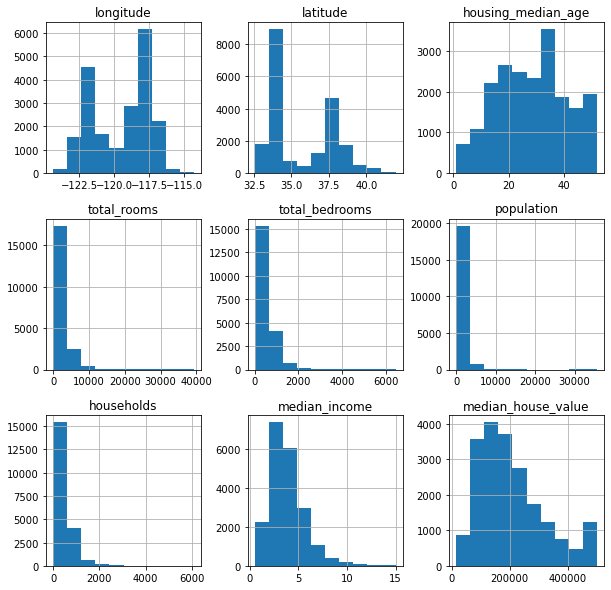

In [9]:
df.hist(figsize=(10, 10));

In [13]:
X = df.drop('ocean_proximity', axis=1)

scaler = RobustScaler(unit_variance=True)
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [23]:
df_pca = pd.DataFrame(data=pca.components_, columns=X.columns, index=['PC1', 'PC2'])
df_pca

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
PC1,0.017681,-0.019463,-0.099896,0.524635,0.494812,0.479106,0.488127,0.028968,0.024477
PC2,-0.007615,-0.064917,-0.002524,0.138857,-0.067134,-0.111614,-0.050466,0.740409,0.639314


In [24]:
pca.explained_variance_ratio_

array([0.6708438 , 0.14470464])

In [25]:
pca.explained_variance_ratio_.sum()

0.8155484354430123

**Without initializing number of components**

In [26]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [29]:
pca.explained_variance_ratio_

array([0.6708438 , 0.14470464, 0.06882171, 0.05221012, 0.02815425,
       0.0213006 , 0.00968932, 0.00259212, 0.00168344])

In [31]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)
var_cumsum

array([0.6708438 , 0.81554844, 0.88437015, 0.93658027, 0.96473451,
       0.98603512, 0.99572444, 0.99831656, 1.        ])

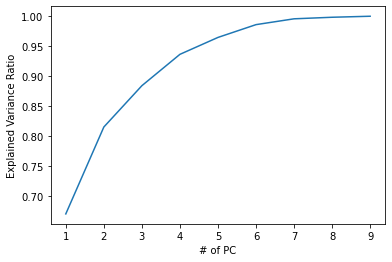

In [36]:
sns.lineplot(x=list(range(1, len(X.columns) + 1)), y=var_cumsum)
plt.xlabel('# of PC')
plt.ylabel('Explained Variance Ratio');


In [38]:
np.argmax(var_cumsum >= 0.9) + 1

4

### **K-Means Clustering**

[Mall Customers](https://www.kaggle.com/datasets/kandij/mall-customers)

In [47]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
df.drop('CustomerID', axis=1, inplace=True)

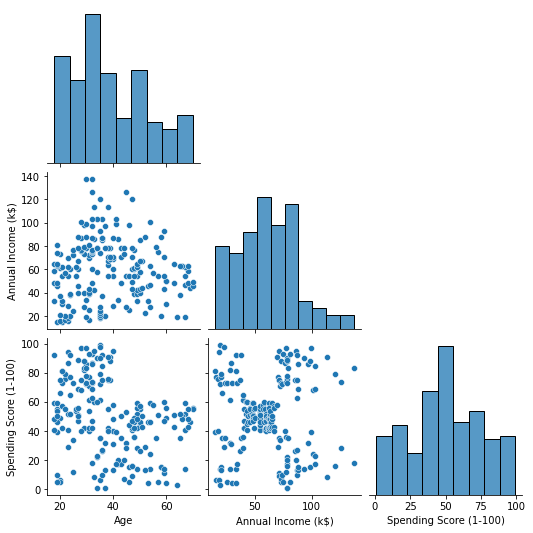

In [42]:
sns.pairplot(df, corner=True);

In [48]:
df_cluster = pd.get_dummies(df, drop_first=True)
df_cluster

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [49]:
X_spending = df[['Spending Score (1-100)']]

In [56]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_spending)

KMeans(n_clusters=3)

In [57]:
kmeans.cluster_centers_

array([[48.35789474],
       [82.06896552],
       [14.59574468]])

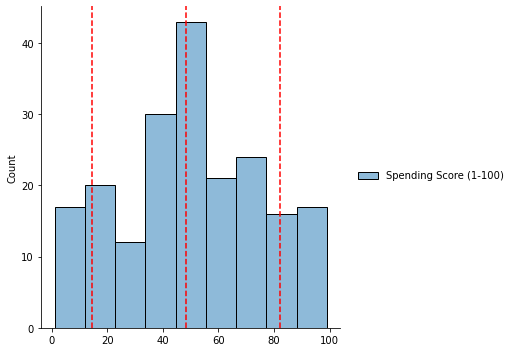

In [58]:
sns.displot(X_spending)
for centroid in kmeans.cluster_centers_:
    plt.axvline(centroid, ls='--', color='red');

In [59]:
kmeans.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [61]:
df_cluster['Cluster'] = kmeans.labels_
df_cluster

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Cluster
0,1,19,15,39,1,0
1,2,21,15,81,1,1
2,3,20,16,6,0,2
3,4,23,16,77,0,1
4,5,31,17,40,0,0
...,...,...,...,...,...,...
195,196,35,120,79,0,1
196,197,45,126,28,0,2
197,198,32,126,74,1,1
198,199,32,137,18,1,2


In [62]:
kmeans.inertia_

13894.874865814574

In [64]:
silhouette_score(X_spending, kmeans.labels_)

0.6540040369722331

**With 2 variables**

In [65]:
X_duo= df[['Spending Score (1-100)', 'Annual Income (k$)']]

kmeans_duo = KMeans(n_clusters=5)
kmeans_duo.fit(X_duo)

KMeans(n_clusters=5)

In [66]:
kmeans_duo.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [67]:
kmeans_duo.inertia_

44448.45544793371

In [68]:
silhouette_score(X_duo, kmeans_duo.labels_)

0.553931997444648

**Finding Optimum K**

In [69]:
X_new = df_cluster[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]

In [74]:
k_range = range(2, 11)
df_k = pd.DataFrame()

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
    kmeans.fit(X_new)

    df_k = df_k.append({
        'n_clusters': k,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_score(X_new, kmeans.labels_)
    }, ignore_index=True)

In [75]:
df_k

,n_clusters,inertia,silhouette
0,2.0,219908.951709,0.254376
1,3.0,143391.592360,0.383799
2,4.0,104422.834985,0.405535
3,5.0,75542.773715,0.439592
4,6.0,58385.197912,0.450657
5,7.0,51577.585923,0.437218
6,8.0,48579.457774,0.390717
7,9.0,46623.092638,0.371632
8,10.0,39982.262349,0.362395


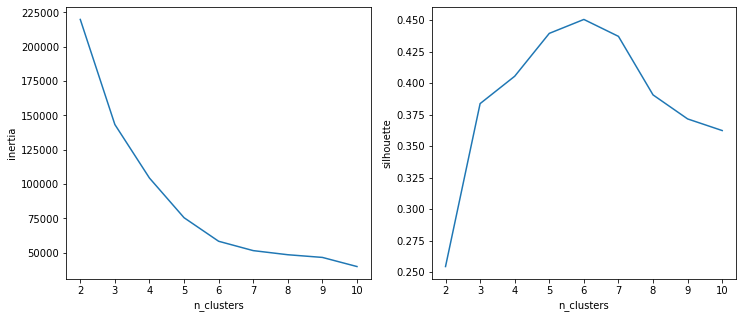

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(x='n_clusters', y='inertia', data=df_k, ax=ax[0])
sns.lineplot(x='n_clusters', y='silhouette', data=df_k, ax=ax[1]);